# Model Save-Load Test

**Objectives:**
  - Test whether a model correctly saves and loads.

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import pickle

In [2]:
(real_train, _), (real_test, _) = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_test = (np.expand_dims(real_test, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

(60000, 28, 28, 1)

In [3]:
real_test.shape

(10000, 28, 28, 1)

In [10]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

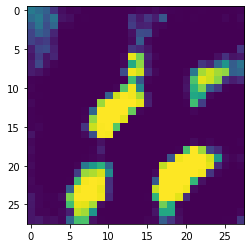

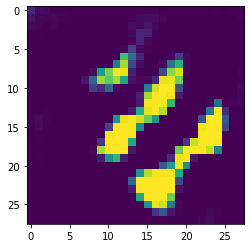

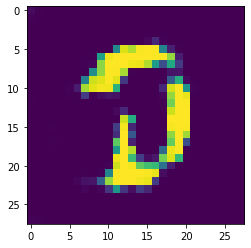

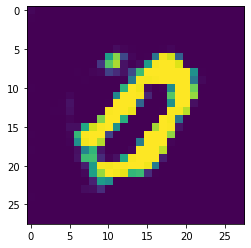

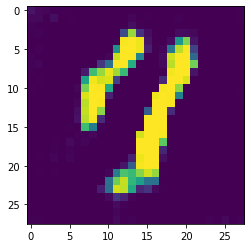

In [11]:
model.train(real_train, num_epochs=5, batch_size=60, labels=(0, 0.9))

In [12]:
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model/combined/assets
INFO:tensorflow:Assets written to: saved_model/generator/assets
INFO:tensorflow:Assets written to: saved_model/discriminator/assets


In [13]:
clear_session()
model2 = gan.GAN(x_shape=real_test.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4),
                 load_dir="saved_model")

Models did load.
Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7

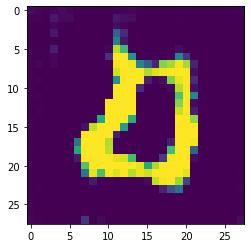

In [15]:
plt.imshow(model2.generator.predict(np.random.randn(1, 100)).reshape(28, 28))

**Test Result**: PASSED

Note:
This save-load method still does not automatically load hyperparameters into the envelope class (GAN). A mismatch between the parameters in the envelope GAN and those in the saved models could be very problematic if a loaded model is trained further.

TODO - find a way to save the entire GAN model efficiently such that the user need not specify any hyperparameters manually when loading a model.